<a href="https://colab.research.google.com/github/jellyplum/pandas/blob/main/CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


--2025-04-27 13:04:39--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.202.100, 74.125.202.101, 74.125.202.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.202.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-04-27 13:04:39--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 192.178.129.132, 2607:f8b0:4001:c6e::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|192.178.129.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2025-04-27 13:0

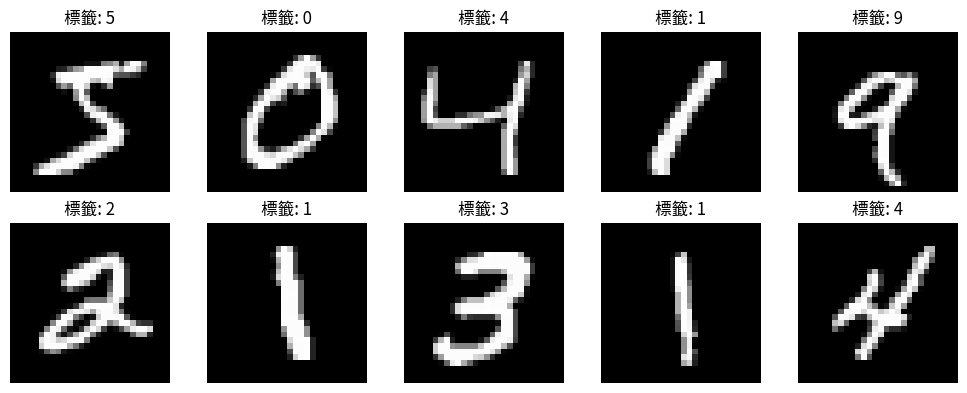

In [44]:
# 匯入必要套件
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 下載台北思源黑體
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
from matplotlib.font_manager import fontManager
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')


# 載入 MNIST 資料集
data = np.load('/content/drive/My Drive/Data_Source/mnist.npz')
x_train = data['x_train']
y_train = data['y_train']


# 顯示多張資料集中的圖片
num_images_to_display = 10  # 你可以更改這個數字來顯示不同數量的圖片

# 建立一個圖表和一個子圖的網格
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))  # 調整 nrows 和 ncols 來設定想要的佈局
axes = axes.flatten()  # 將 axes 陣列扁平化以便更容易索引

for i in range(num_images_to_display):
    # 將圖片重塑為 (28, 28) 並顯示它
    image = x_train[i].reshape(28, 28)
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"標籤: {y_train[i]}")
    axes[i].axis('off')  # 隱藏軸刻度和標籤

plt.tight_layout()  # 調整子圖之間的間距
plt.show()

['x_test', 'x_train', 'y_train', 'y_test']
(60000, 28, 28)
(60000,)
訓練資料 x_train 形狀： (60000, 28, 28)
訓練標籤 y_train 形狀： (60000,)


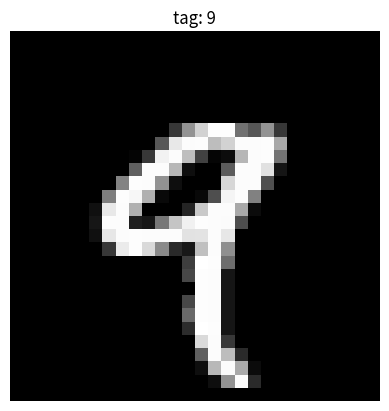

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.9016 - loss: 0.3158 - val_accuracy: 0.9819 - val_loss: 0.0538
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9850 - loss: 0.0474 - val_accuracy: 0.9877 - val_loss: 0.0365
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9895 - loss: 0.0330 - val_accuracy: 0.9896 - val_loss: 0.0331
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9920 - loss: 0.0234 - val_accuracy: 0.9898 - val_loss: 0.0317
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9944 - loss: 0.0177 - val_accuracy: 0.9905 - val_loss: 0.0305
313/313 - 2s - 7ms/step - accuracy: 0.9905 - loss: 0.0305

測試資料集上的準確率：0.9905


In [45]:

# 讀取 mnist.npz
data = np.load('/content/drive/My Drive/Data_Source/mnist.npz')

# 查看有哪些內容
print(data.files)

# 分別讀取訓練與測試資料
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)
# 顯示資料形狀
print("訓練資料 x_train 形狀：", x_train.shape)  # (60000, 28, 28)
print("訓練標籤 y_train 形狀：", y_train.shape)

# 將資料正規化到 [0, 1] 區間
x_train = x_train / 255.0
x_test = x_test / 255.0

# 增加一個通道維度 (channel)，讓資料符合 CNN 輸入格式
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# 顯示一張手寫數字圖片
plt.imshow(x_train[4].reshape(28,28), cmap='gray')
plt.title(f"tag: {y_train[4]}")
plt.axis('off')
plt.show()

# 建立一個簡單的CNN模型
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # 卷積層
    tf.keras.layers.MaxPooling2D((2, 2)),                                           # 池化層
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),                          # 卷積層
    tf.keras.layers.MaxPooling2D((2, 2)),                                           # 池化層
    tf.keras.layers.Flatten(),                                                      # 拉平成一維向量
    tf.keras.layers.Dense(64, activation='relu'),                                   # 全連接層
    tf.keras.layers.Dense(10)                                                       # 輸出層（10個類別：0~9）
])

# 編譯模型
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 訓練模型
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 評估模型
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n測試資料集上的準確率：{test_acc:.4f}")


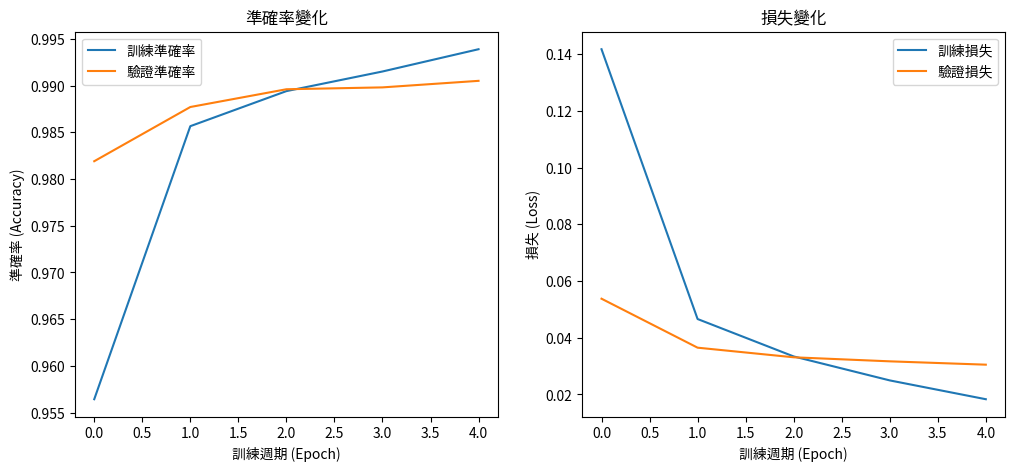

In [46]:
# 畫出訓練過程的準確率變化
plt.figure(figsize=(12, 5))

# 準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='訓練準確率')
plt.plot(history.history['val_accuracy'], label='驗證準確率')
plt.title('準確率變化')
plt.xlabel('訓練週期 (Epoch)')
plt.ylabel('準確率 (Accuracy)')
plt.legend()

# 損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='訓練損失')
plt.plot(history.history['val_loss'], label='驗證損失')
plt.title('損失變化')
plt.xlabel('訓練週期 (Epoch)')
plt.ylabel('損失 (Loss)')
plt.legend()

plt.show()
